In [1]:
from data import Dataset
from mlp import myRegression
from lightgbm_wrap import lightgbm_pipeline
from utils import plot_loss
import config

In [2]:
dataset = Dataset()
train_data, test_data = dataset.train_test_split
labels = dataset.label

In [3]:
pipeline = myRegression(train_data, labels, test_data,
                        config.SPLIT_SIZE, 'nnRegression', submission=True)
loss, submission_mlp=pipeline(epochs = config.EPOCHS)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:19<00:00,  2.51it/s]


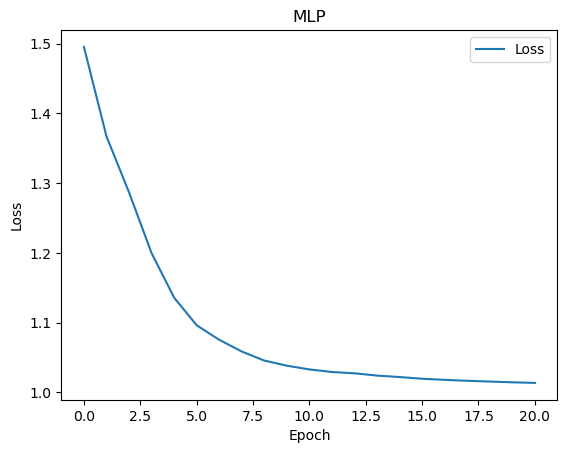

In [4]:
plot_loss(loss_list=loss, method="MLP")

In [5]:
submission_mlp

,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMDC,...,ZSCAN5A,ZSCAN9,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM9
0,0.077648,0.479250,-0.391490,0.223065,0.968638,0.384027,-0.090424,-0.439416,0.538912,0.074089,...,0.501362,-0.062778,-0.085053,-0.070357,0.453738,0.384654,0.236787,-0.196093,0.167812,0.203481
1,0.093301,0.453667,-0.408191,0.211022,0.948394,0.369908,-0.098284,-0.444281,0.527195,0.093963,...,0.465306,-0.065256,-0.074501,-0.067368,0.456088,0.397265,0.251606,-0.210524,0.161671,0.178909
2,0.110232,0.431632,-0.421632,0.197405,0.925631,0.354120,-0.107188,-0.446786,0.513316,0.115993,...,0.430039,-0.068139,-0.063936,-0.065621,0.456583,0.408328,0.267650,-0.224357,0.152361,0.151690
3,0.130245,0.410081,-0.430619,0.184563,0.906199,0.341355,-0.117696,-0.453857,0.500584,0.139339,...,0.394457,-0.069925,-0.052973,-0.063994,0.454537,0.415918,0.284741,-0.237430,0.143047,0.123511
4,0.146956,0.388149,-0.440188,0.168804,0.887130,0.325152,-0.127308,-0.466438,0.487566,0.159507,...,0.359239,-0.070794,-0.042966,-0.062845,0.451742,0.422816,0.302153,-0.250205,0.133344,0.094811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.185749,-0.365579,-0.176346,-0.757579,-0.076459,-0.511306,0.074696,0.237284,0.299205,-0.223873,...,0.906122,-0.253589,-0.559173,0.514998,-0.298535,1.106413,-0.210807,0.879038,0.176675,0.661264
251,0.194158,-0.380536,-0.176291,-0.766732,-0.063896,-0.522760,0.070076,0.247397,0.317143,-0.230855,...,0.930543,-0.256279,-0.571402,0.518780,-0.297588,1.114298,-0.221664,0.889806,0.167079,0.670506
252,0.203842,-0.397507,-0.174943,-0.776736,-0.046877,-0.533583,0.064837,0.259147,0.332221,-0.235985,...,0.953844,-0.258064,-0.585087,0.520634,-0.297233,1.122785,-0.231906,0.902331,0.155109,0.681694
253,0.213814,-0.415029,-0.173681,-0.786879,-0.029079,-0.544312,0.059198,0.271238,0.346711,-0.240497,...,0.977096,-0.259846,-0.598858,0.522496,-0.296853,1.131291,-0.242219,0.914807,0.143128,0.692910


In [6]:
output = lightgbm_pipeline(x=train_data, labels=labels, test_data=test_data, split_size=labels.shape[1])
output

 70%|██████▉   | 12738/18210 [27:32<19:53,  4.58it/s] 

In [ ]:
submission_lgb = output

In [ ]:
from utils import submit_kaggle
submit_kaggle(output= 0.3 * submission_mlp + 0.7 * submission_lgb, submit_time=1)